In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load the training/testing dataset from csv files
training_dataset = pd.read_csv("train_file.csv", header=0, usecols=[*range(1,26)], sep=",")
testing_dataset = pd.read_csv("test_file.csv", header=0, usecols=[*range(1,26)], sep=",")

# Remove missing values
training_dataset.dropna(axis = 0, inplace = True)
testing_dataset.dropna(axis = 0, inplace = True)

print("The shape of the training dataset: " + str(training_dataset.shape))
print("The shape of the testing dataset: " + str(testing_dataset.shape))

training_dataset.head()

# Set of features in the dataset
features = list(testing_dataset.columns)
print(features[:-1])

# Convert the expected output into arrays, e.g., 1 -> [1, 0, 0]
output_training = []
for i, val in enumerate(training_dataset.iloc[:,24]):
    temp = [0, 0, 0]
    temp[val - 1] = 1
    output_training.append(temp)

output_testing = []
for i, val in enumerate(testing_dataset.iloc[:,24]):
    temp = [0, 0, 0]
    temp[val - 1] = 1
    output_testing.append(temp)

# Remove the expected output column from the datasets
prep_training_dataset = training_dataset.drop(columns=['output'])
prep_testing_dataset = testing_dataset.drop(columns=['output'])

# Preprocessing the data
scaler = StandardScaler()
scaler.fit(prep_training_dataset)

# Apply transform to both the training/testing dataset.
X_train = scaler.transform(prep_training_dataset)
Y_train = np.array(output_training)

X_test = scaler.transform(prep_testing_dataset)
Y_test = np.array(output_testing)

print("Preprocessed inputs of the training dataset: " + str(X_train))
print("Preprocessed outputs of the training dataset: " + str(Y_train))

The shape of the training dataset: (280, 25)
The shape of the testing dataset: (100, 25)
['session_time', '%tcp_protocol', '%udp_protocol', 'ul_data_volume', 'max_ul_volume', 'min_ul_volume', 'avg_ul_volume', 'std_ul_volume', '%ul_volume', 'dl_data_volume', 'max_dl_volume', 'min_dl_volume', 'avg_dl_volume', 'std_dl_volume', '%dl_volume', 'nb_uplink_packet', 'nb_downlink_packet', '%ul_packet', '%dl_packet', 'kB/s', 'nb_packet/s', 'avg_handshake_time', 'avg_app_response_time', 'avg_data_transfer_time']
Preprocessed inputs of the training dataset: [[ 0.5300728   0.66135707 -0.66140055 ...  0.          0.
   0.        ]
 [-0.46944059  0.66095453 -0.66099748 ...  0.          0.
   0.        ]
 [-0.54013324  0.65856788 -0.65860771 ...  0.          0.
   0.        ]
 ...
 [-0.61447889  0.65436101 -0.65439532 ...  0.          0.
   0.        ]
 [-0.6193408   0.6618874  -0.66193158 ...  0.          0.
   0.        ]
 [-0.6255422   0.6618874  -0.66193158 ...  0.          0.
   0.        ]]
Prepr

In [38]:
import lightgbm as ltb
from sklearn import metrics
from sklearn.metrics import confusion_matrix

model_ltb = ltb.LGBMRegressor(objective='regression',
                              num_leaves=144,
                              learning_rate=0.005, 
                              n_estimators=1000, 
                              max_depth=12,
                              metric='rmse',
                              is_training_metric=True,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              verbose=-1,
                              bagging_freq = 5, 
                              feature_fraction = 0.9)

model = ltb.LGBMClassifier()
# Using Y_train here got an error of shape
model.fit(X_train, training_dataset.iloc[:,24])
    
Y_expected = testing_dataset.iloc[:,24]
Y_predicted = model.predict(X_test)

r_2_score = metrics.r2_score(Y_expected, Y_predicted)
mean_squared_log_error_score = metrics.mean_squared_log_error(Y_expected, Y_predicted)
print("r_2 score: %f" % (r_2_score))
print("mean_squared_log_error score: %f" % (mean_squared_log_error_score))

wrong_preds = []
for i in range(len(Y_expected)):
    if Y_predicted[i] != Y_expected[i]:
        wrong_preds.append(i)

print(wrong_preds) # 70
print("Wrong prediction: predicted " + str(Y_predicted[70]) + " while expected " + str(Y_expected[70]))

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

r_2 score: 0.928303
mean_squared_log_error score: 0.004805
[70]
Wrong prediction: predicted 1 while expected 3
[[77  0  0]
 [ 0  7  0]
 [ 1  0 15]]


session_time              7.324516e+01
%tcp_protocol             2.666319e+00
%udp_protocol             9.726854e+01
ul_data_volume            5.140930e+05
max_ul_volume             1.514000e+03
min_ul_volume             4.600000e+01
avg_ul_volume             1.706816e+02
std_ul_volume             2.771775e+02
%ul_volume                2.017622e+00
dl_data_volume            2.496605e+07
max_dl_volume             1.514000e+03
min_dl_volume             5.400000e+01
avg_dl_volume             1.247305e+03
std_dl_volume             2.231813e+02
%dl_volume                9.798238e+01
nb_uplink_packet          3.012000e+03
nb_downlink_packet        2.001600e+04
%ul_packet                1.307973e+01
%dl_packet                8.692027e+01
kB/s                      3.478748e+02
nb_packet/s               3.143962e+02
avg_handshake_time        0.000000e+00
avg_app_response_time     0.000000e+00
avg_data_transfer_time    0.000000e+00
output                    3.000000e+00
Name: 70, dtype: float64

In [41]:
testing_dataset.iloc[70,:]

session_time              7.324516e+01
%tcp_protocol             2.666319e+00
%udp_protocol             9.726854e+01
ul_data_volume            5.140930e+05
max_ul_volume             1.514000e+03
min_ul_volume             4.600000e+01
avg_ul_volume             1.706816e+02
std_ul_volume             2.771775e+02
%ul_volume                2.017622e+00
dl_data_volume            2.496605e+07
max_dl_volume             1.514000e+03
min_dl_volume             5.400000e+01
avg_dl_volume             1.247305e+03
std_dl_volume             2.231813e+02
%dl_volume                9.798238e+01
nb_uplink_packet          3.012000e+03
nb_downlink_packet        2.001600e+04
%ul_packet                1.307973e+01
%dl_packet                8.692027e+01
kB/s                      3.478748e+02
nb_packet/s               3.143962e+02
avg_handshake_time        0.000000e+00
avg_app_response_time     0.000000e+00
avg_data_transfer_time    0.000000e+00
output                    3.000000e+00
Name: 70, dtype: float64

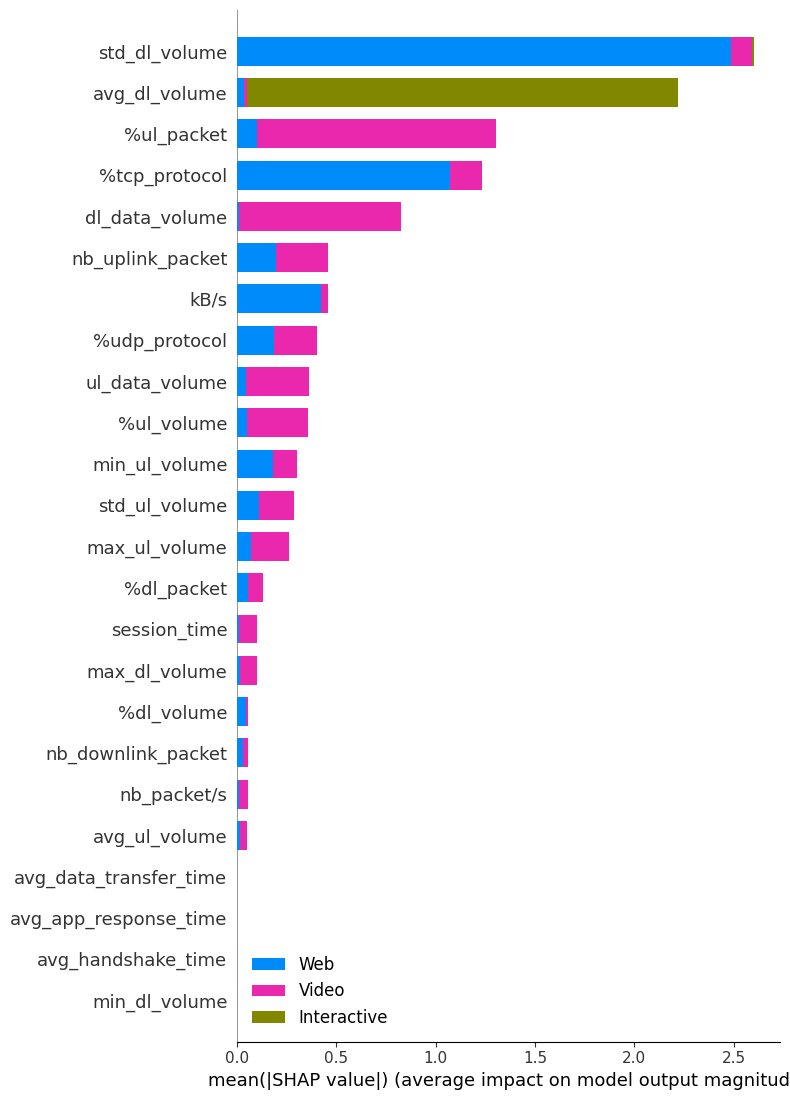

In [93]:
import shap
import warnings

classes=['Web', 'Interactive', 'Video']

#ltb_explainer = shap.KernelExplainer(model.predict, X_test)
ltb_explainer = shap.TreeExplainer(model)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    shap_values = ltb_explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features, max_display=24, class_names=classes)

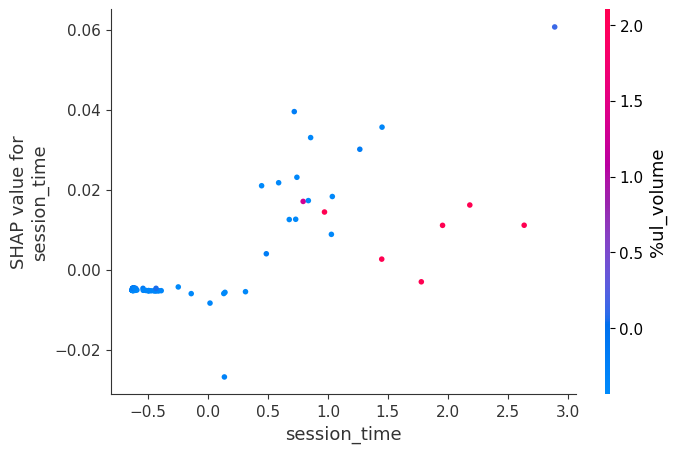

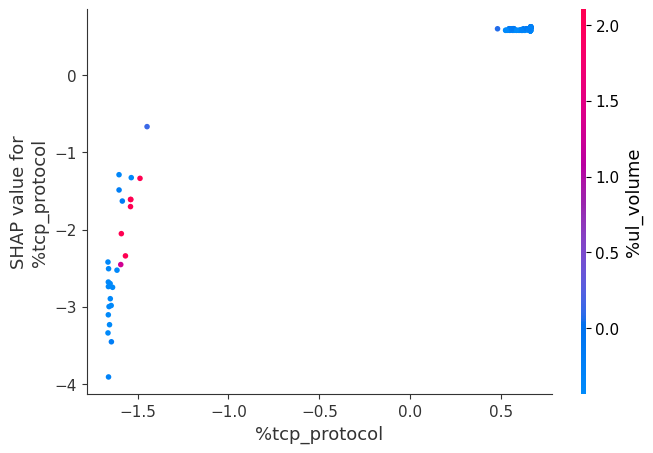

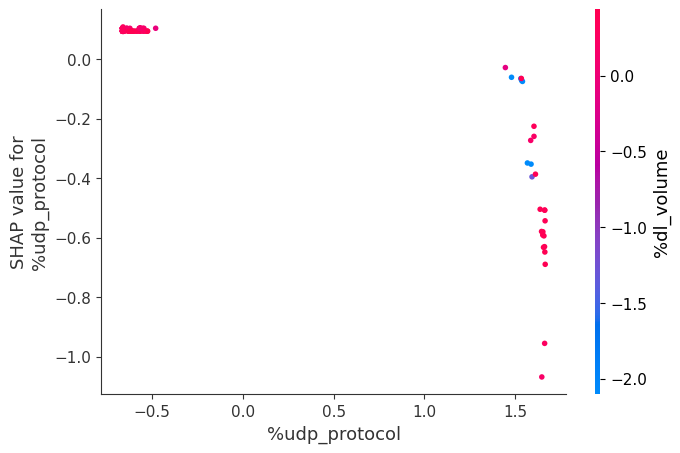

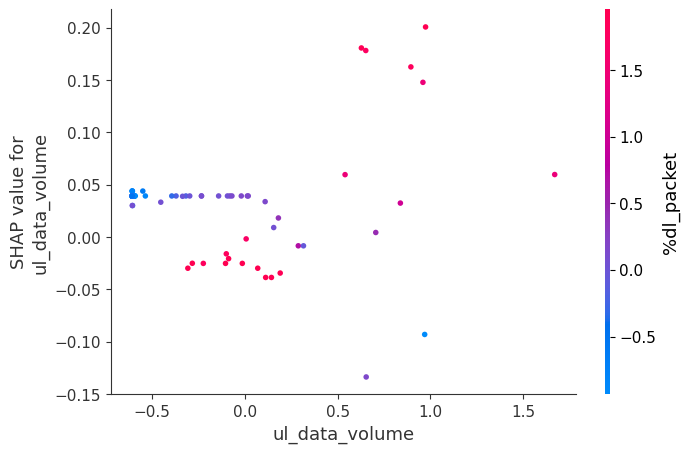

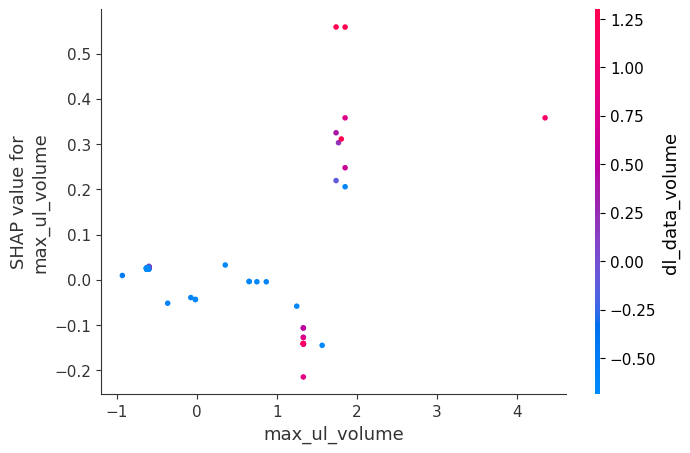

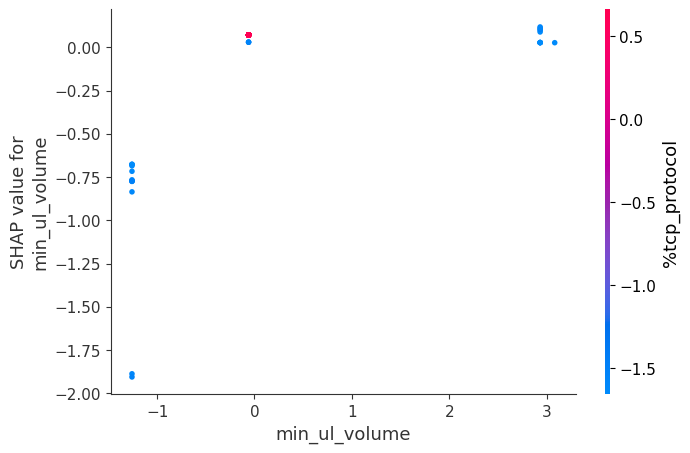

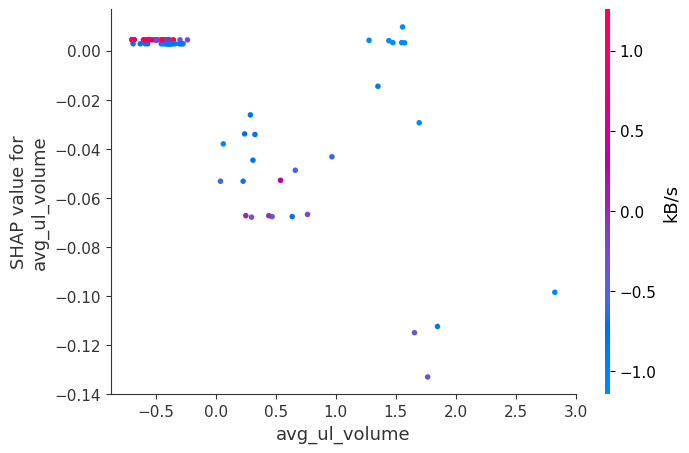

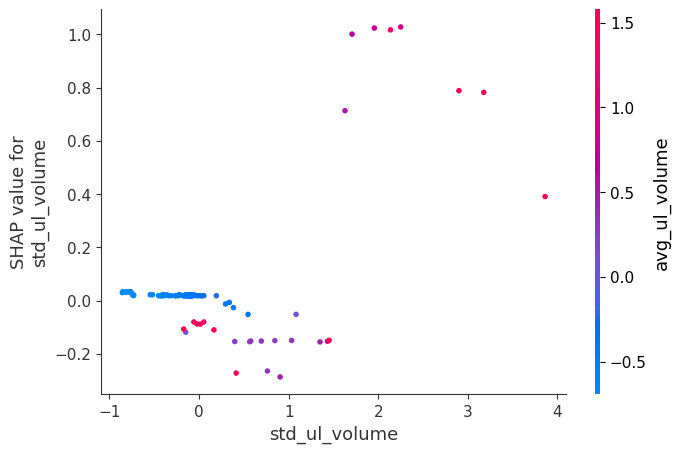

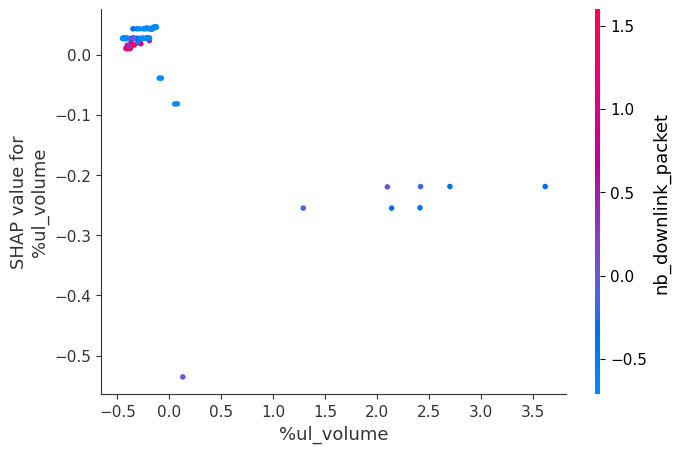

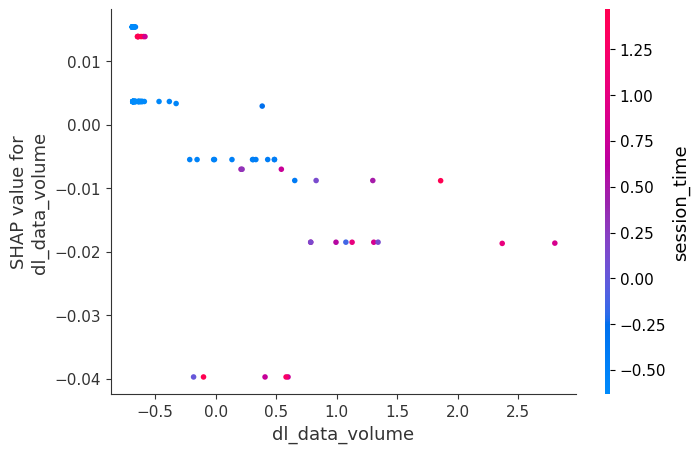

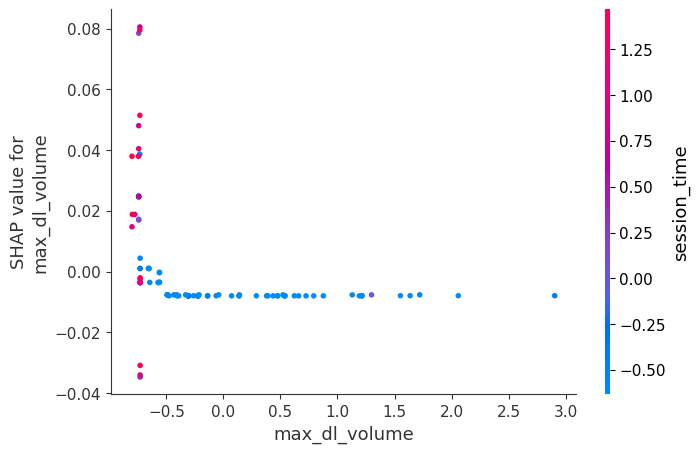

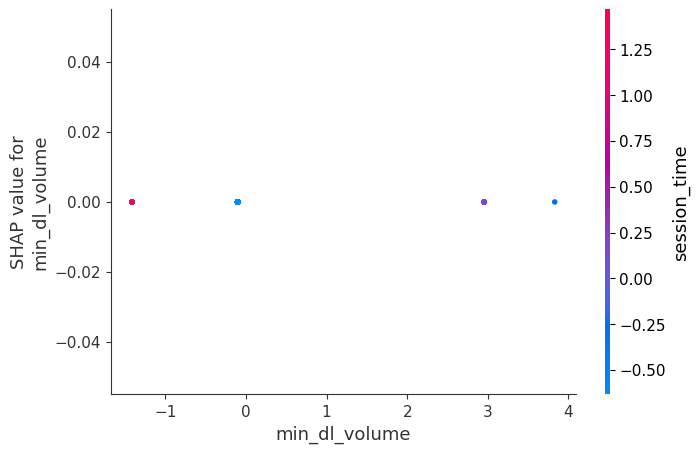

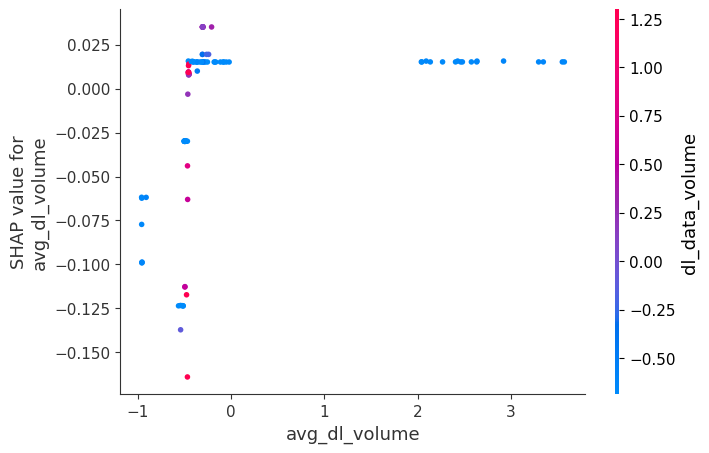

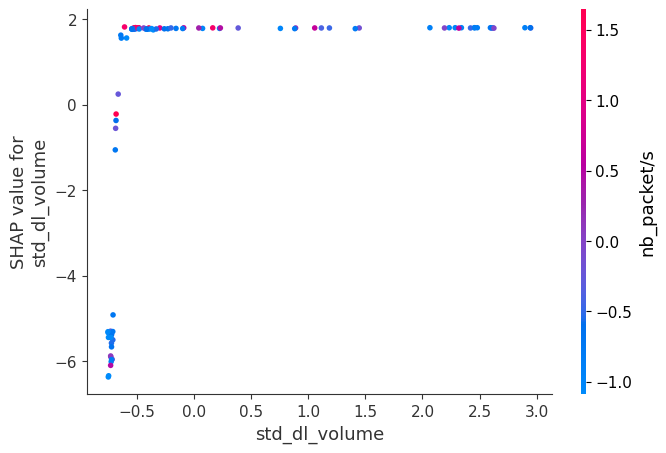

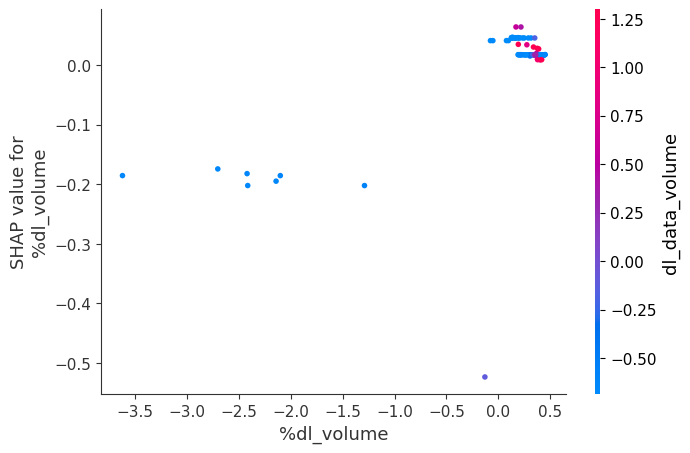

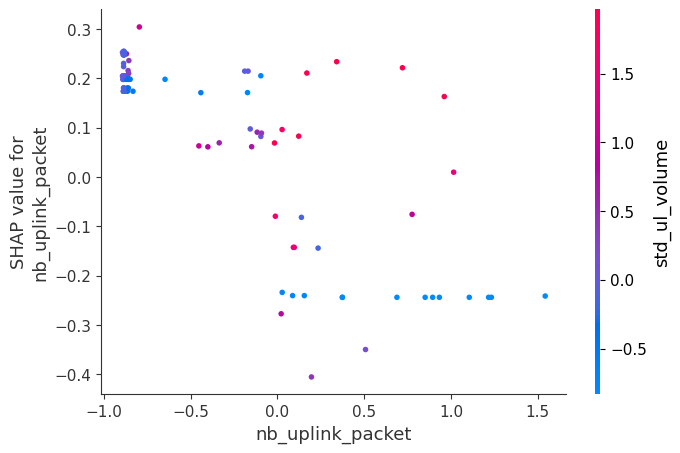

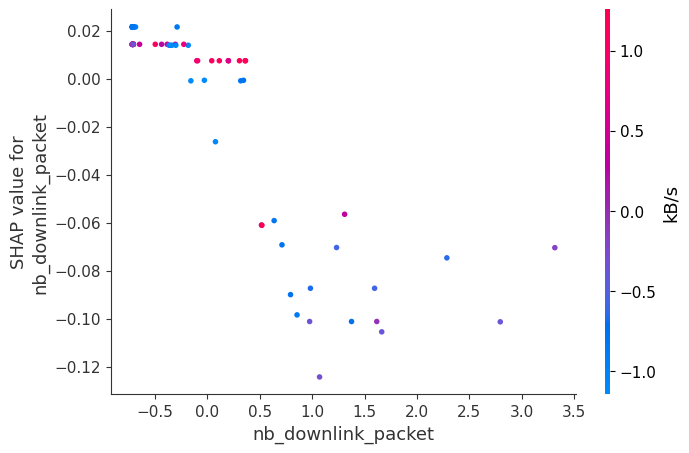

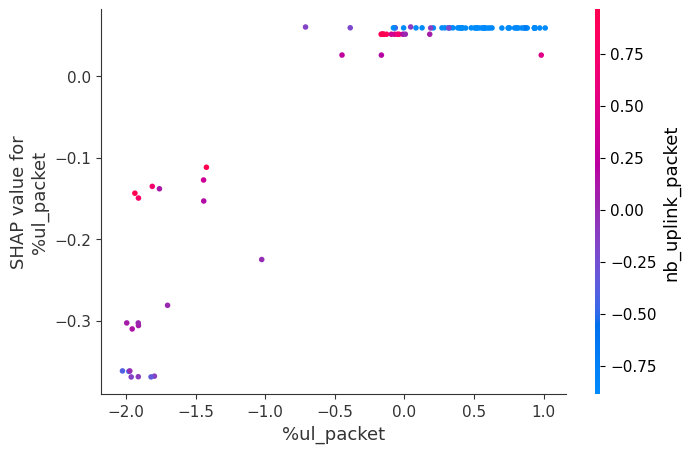

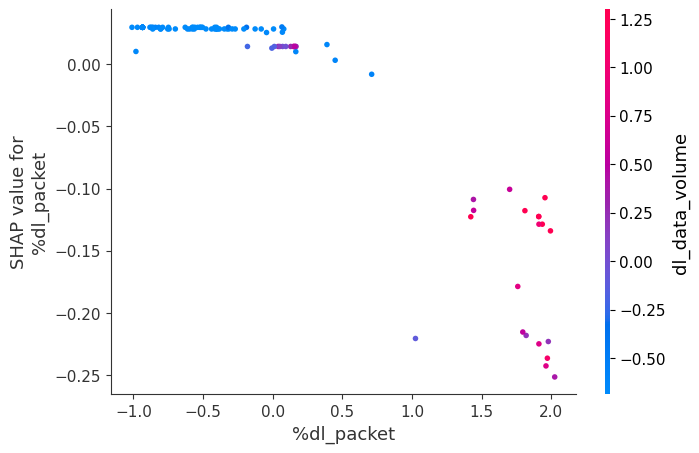

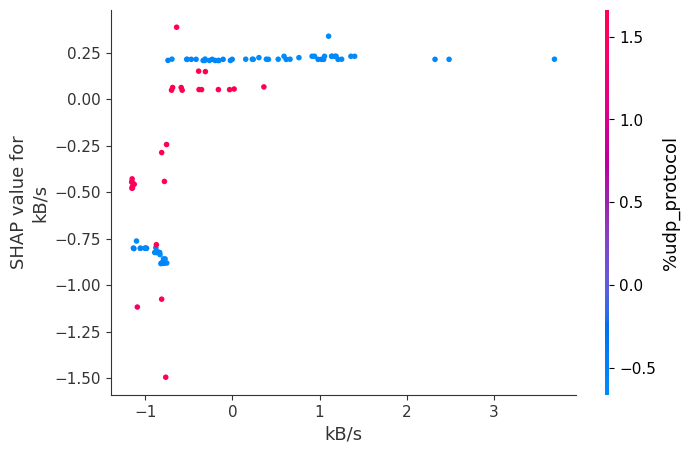

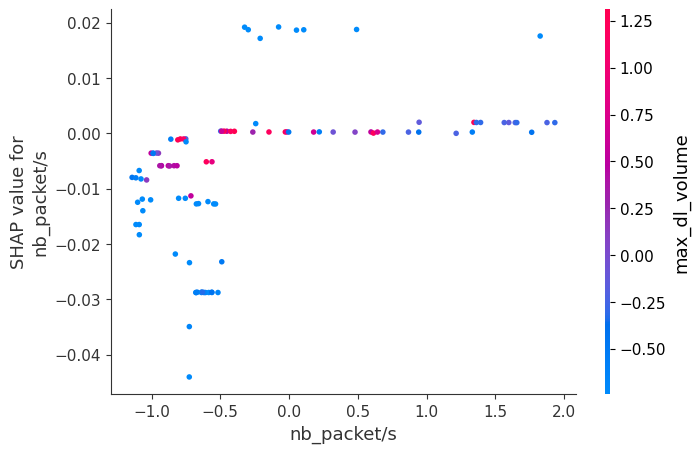

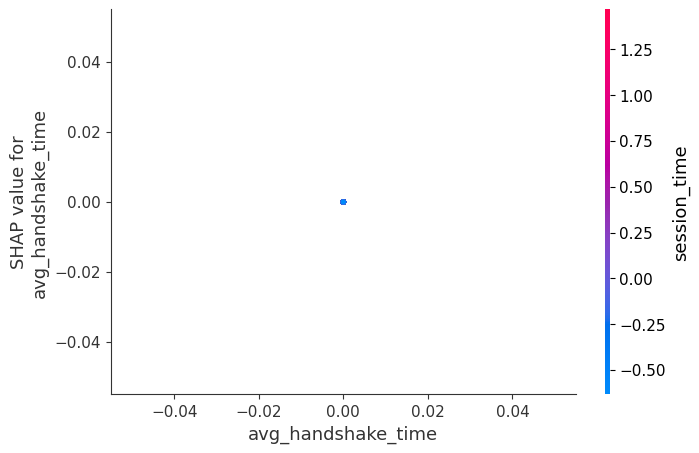

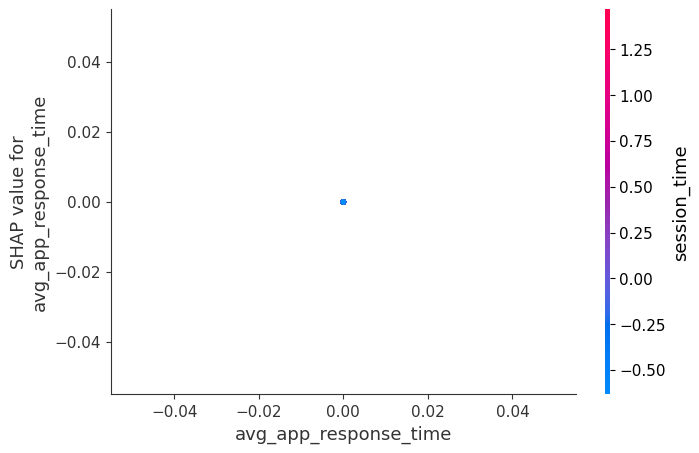

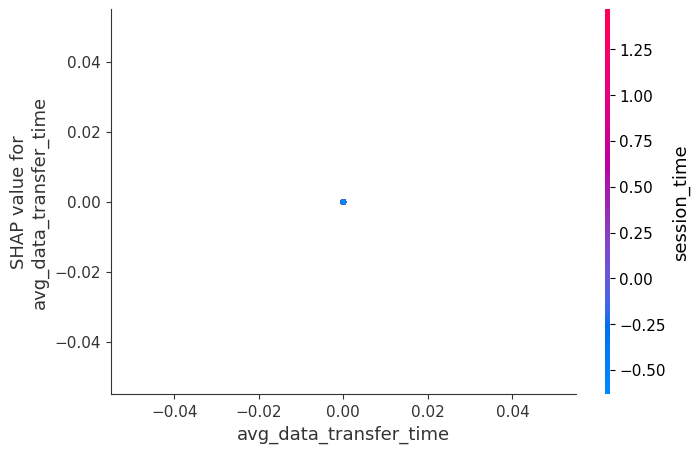

In [102]:
#for name in testing_dataset.columns:
#    shap.dependence_plot(name, shap_value, X_test)
#print(len(testing_dataset))
#for name in list(testing_dataset.columns):
#    print(name)

#shap_values = shap.TreeExplainer(model).shap_values(X_test)
#print(len(features))
for i in range(len(features[:-1])):
    shap.dependence_plot(i, shap_values[0], X_test, feature_names=features)